<a href="https://colab.research.google.com/github/MattLowrie/visualizing_running_time/blob/master/Interview_Questions_Largest_Odd_Number.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Largest Odd Number

This question asks to find the largest odd number within a given array of numbers. If no odd number is found, the function should return `None`.

The first implementation below keeps track of the largest odd number while iterating the array once, so it solves the problem in `O(n)` running time. The second solution first finds all of the odd numbers in a separate array, then sorts the array to return the last item in the array as the largest odd integer. Not only does this solution use `O(n)` space by adding a separate array, the sort operation adds `O(n log n)` running time, as the graphs below demonstrate.

In [0]:
from typing import List

def largest_odd_number_fast(numbers: List[int]) -> (int or None):
  """O(n) implementation."""
  if not len(numbers):
    return None
  largest = None
  for n in numbers:
    if n % 2 != 0:
      if largest is None:
        largest = n
      elif n > largest:
        largest = n
  return largest

def largest_odd_number_slow(numbers: List[int]) -> (int or None):
  """O(n log n) implementation."""
  odds = []
  for n in numbers:
    if not n % 2 == 0:
      odds.append(n)
  if not len(odds):
    return None
  return sorted(odds)[-1]

In [2]:
# Test both implementations
!pip install parameterized
from parameterized import parameterized
import unittest
test_cases = [
  ('Test0', [], None),
  ('Test1', [2], None),
  ('Test2', [2, 1], 1),
  ('Test3', [2, 9, 1], 9),
  ('Test4', [4, 3, 5, 1], 5),
  ('Test5', [5, 5, 4, 5, 2], 5),
  ('Test6', [11, 2, 3, 3, 2, 1], 11),
  ('Test7', [2, 4, 6, 8, 10, 12, 14], None),
  ('Test8', [8, 2, 1, 7, 5, 7, 3, 8], 7),
  ('Test9', [8, 4, 6, 2, 6, 4, 9, 5, 99], 99),
]

class TestFirstDuplicate(unittest.TestCase):
  @parameterized.expand(test_cases)
  def testFast(self, name, arr, expected):
    actual = largest_odd_number_fast(arr)
    self.assertEqual(expected, actual)
  @parameterized.expand(test_cases)
  def testSlow(self, name, arr, expected):
    actual = largest_odd_number_slow(arr)
    self.assertEqual(expected, actual)

unittest.main(argv=[''], verbosity=0, exit=False)

----------------------------------------------------------------------
Ran 20 tests in 0.001s

OK


In [0]:
# Create input arrays of increasing sizes
import random
input_sizes = [2**e for e in range(12, 21)]
input_arrs = {}
for size in input_sizes:
  input_arrs[size] = [random.randrange(1, size+1) for _ in range(size)]

In [4]:
# Now time both functions with each input array
timing_samples = {}
for size, input_arr in input_arrs.items():
  tf = %timeit -o -n 3 largest_odd_number_fast(input_arr)
  timing_samples[(size, 'fast')] = tf
  ts = %timeit -o -n 3 largest_odd_number_slow(input_arr)
  timing_samples[(size, 'slow')] = ts

3 loops, best of 3: 287 µs per loop
3 loops, best of 3: 816 µs per loop
3 loops, best of 3: 595 µs per loop
3 loops, best of 3: 1.71 ms per loop
3 loops, best of 3: 1.16 ms per loop
3 loops, best of 3: 3.46 ms per loop
3 loops, best of 3: 2.27 ms per loop
3 loops, best of 3: 7.74 ms per loop
3 loops, best of 3: 4.88 ms per loop
3 loops, best of 3: 20 ms per loop
3 loops, best of 3: 9.24 ms per loop
3 loops, best of 3: 42.8 ms per loop
3 loops, best of 3: 18.9 ms per loop
3 loops, best of 3: 98.3 ms per loop
3 loops, best of 3: 37.8 ms per loop
3 loops, best of 3: 221 ms per loop
3 loops, best of 3: 76.8 ms per loop
3 loops, best of 3: 494 ms per loop


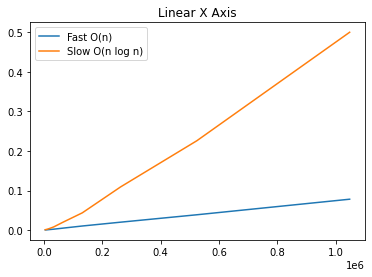

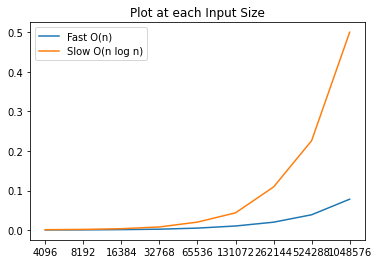

In [5]:
# Chart the timing data
chart_data = []
# for num_loops in loop_intervals:
for size in input_sizes:
  row = []
  fast_sample = timing_samples[(size, 'fast')]
  slow_sample = timing_samples[(size, 'slow')]
  row.append(((fast_sample.best + fast_sample.worst) / 2))
  row.append(((slow_sample.best + slow_sample.worst) / 2))
  chart_data.append(row)

import pandas as pd

legend = ['Fast O(n)', 'Slow O(n log n)']
# Show a linear chart
df1 = pd.DataFrame(chart_data, index=input_sizes, columns=legend)
df1.plot(title='Linear X Axis')
# Show a chart with normalized x-axis plots to highlight the logarithmic growth
x_labels = [str(x) for x in input_sizes]
df2 = pd.DataFrame(chart_data, index=x_labels, columns=legend)
df2.plot(title='Plot at each Input Size')